In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from functools import partial
# import matplotlib.gridspec as gridspec
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from scipy.stats import norm

from MVN import MultivariateNormal
from MCMC import MetropolisHastings, Gibbs
from multiple_chains import MultipleChains
import seaborn as sns


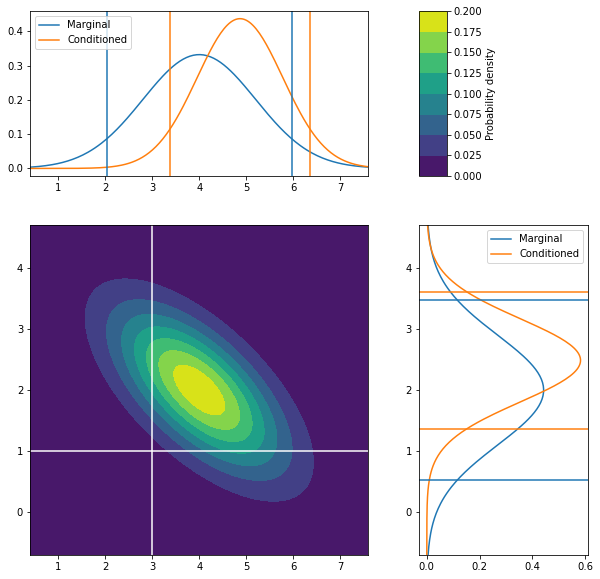

In [2]:
mean = np.array([4, 2])
covariance = np.array([
    [1.44, -.702],
    [-.702, .81]])
CL = .90

n = MultivariateNormal(mean, covariance)
# this class, defined in a separate file, has all the properties we need

n.plot_2d_analytical(3, 1, CL)
# bivariate plot of the Gaussian, including marginal distributions
# and conditioned distributions on the values provided as arguments
# and credible intervals for each univariate Gaussian 

In [3]:
# Let us see some numbers

m = n.marginalize(0)
CI_x_analytical = m.analytical_CI(CL)
print(f'The Credible Interval is between {CI_x_analytical[0]:.2f} and {CI_x_analytical[1]:.2f}')

The Credible Interval is between 2.03 and 5.97


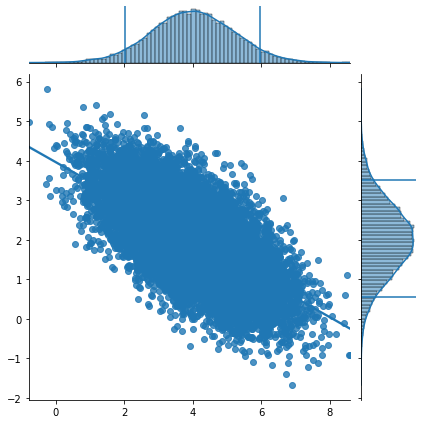

In [8]:
# CHOLESKY SAMPLING

# samples_ch = n.cholesky_sample(20000)
grid = sns.jointplot(x=samples_ch[:, 0], y=samples_ch[:, 1], kind='reg')

interval_x = MetropolisHastings.interval_from_samples(samples_ch[:,0], CL)
[grid.ax_marg_x.axvline(x) for x in interval_x]

interval_y = MetropolisHastings.interval_from_samples(samples_ch[:,1], CL)
[grid.ax_marg_y.axhline(y) for y in interval_y]


In [10]:
# METROPOLIS - HASTINGS SAMPLING

# def gaussian_proposal(theta=None):
#     return (np.random.normal(scale=1, size=2))
from numpy.random import default_rng

def gaussian_proposal(theta=None):
    rng = default_rng()
    return(rng.standard_normal(size=2))

num_chains = 7
spread_initial_positions = 10
initial_positions = np.random.normal(scale=spread_initial_positions, size=(num_chains, 2))

trim_amount = 0
chain_length = 100

mc = MultipleChains(MetropolisHastings, n.pdf, initial_positions,
                       chain_length + trim_amount, gaussian_proposal)
mc.trim_chains(trim_amount)


In [11]:
# mc.extend_chains(10000)

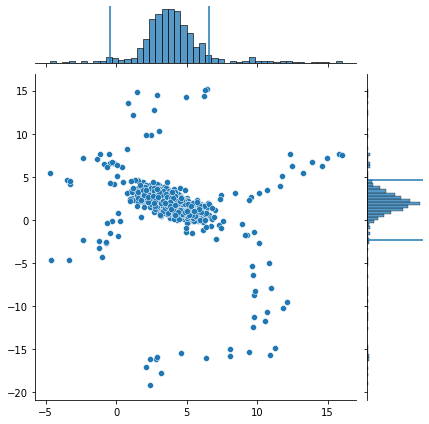

In [12]:
samples_mh = mc.all_chains
grid = sns.jointplot(x=samples_mh[:, 0], y=samples_mh[:, 1], kind='scatter')

interval_x = MetropolisHastings.interval_from_samples(samples_mh[:,0], CL)
[grid.ax_marg_x.axvline(x) for x in interval_x]

interval_y = MetropolisHastings.interval_from_samples(samples_mh[:,1], CL)
[grid.ax_marg_y.axhline(y) for y in interval_y]

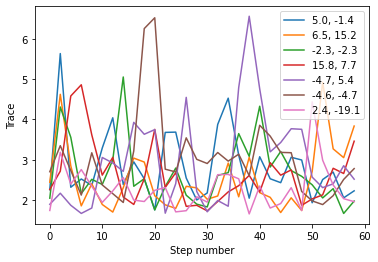

In [13]:
mc.trim_chains(40)
mc.traces_plot(every=2)

In [45]:
mc.R_estimator()

array([[ 1.1236081 , -0.10131121],
       [-0.10131121,  1.31729734]])

2000